<a href="https://colab.research.google.com/github/Sreenidhiangadi/OIBSIP/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [ ]:
df.head(1200)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.shape


(150, 6)

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<ipython-input-18-b91299843587>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

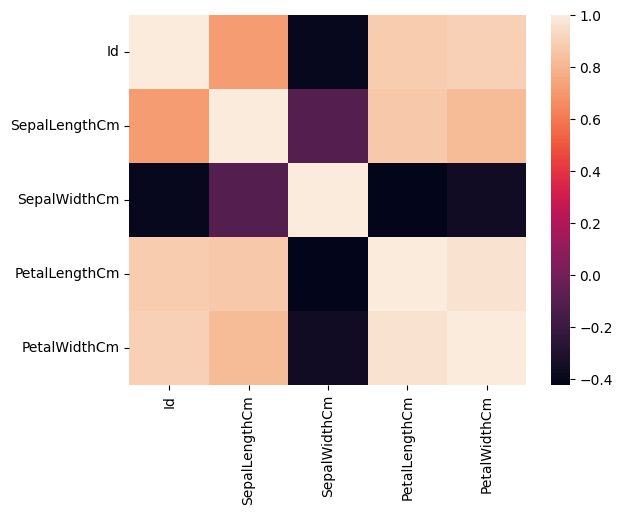

In [ ]:
corr=df.corr()
sns.heatmap(data=corr)

In [ ]:
data=df.values
x=data[:,0:4]
y=data[:,4]
print(y)

[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.1 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.0 1.3 1.4 1.0 1.5 1.0 1.4 1.3 1.4 1.5 1.0 1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.0 1.1 1.0 1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 1.2 1.4 1.2 1.0 1.3 1.2 1.3 1.3 1.1 1.3 2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8
 1.8 2.5 2.0 1.9 2.1 2.0 2.4 2.3 1.8 2.2 2.3 1.5 2.3 2.0 2.0 1.8 2.1 1.8
 1.8 1.8 2.1 1.6 1.9 2.0 2.2 1.5 1.4 2.3 2.4 1.8 1.8 2.1 2.4 2.3 1.9 2.3
 2.5 2.3 1.9 2.0 2.3 1.8]


In [ ]:
data=df.values
x=data[:,0:4]
y=data[:,4]
print(x)

[[1 5.1 3.5 1.4]
 [2 4.9 3.0 1.4]
 [3 4.7 3.2 1.3]
 [4 4.6 3.1 1.5]
 [5 5.0 3.6 1.4]
 [6 5.4 3.9 1.7]
 [7 4.6 3.4 1.4]
 [8 5.0 3.4 1.5]
 [9 4.4 2.9 1.4]
 [10 4.9 3.1 1.5]
 [11 5.4 3.7 1.5]
 [12 4.8 3.4 1.6]
 [13 4.8 3.0 1.4]
 [14 4.3 3.0 1.1]
 [15 5.8 4.0 1.2]
 [16 5.7 4.4 1.5]
 [17 5.4 3.9 1.3]
 [18 5.1 3.5 1.4]
 [19 5.7 3.8 1.7]
 [20 5.1 3.8 1.5]
 [21 5.4 3.4 1.7]
 [22 5.1 3.7 1.5]
 [23 4.6 3.6 1.0]
 [24 5.1 3.3 1.7]
 [25 4.8 3.4 1.9]
 [26 5.0 3.0 1.6]
 [27 5.0 3.4 1.6]
 [28 5.2 3.5 1.5]
 [29 5.2 3.4 1.4]
 [30 4.7 3.2 1.6]
 [31 4.8 3.1 1.6]
 [32 5.4 3.4 1.5]
 [33 5.2 4.1 1.5]
 [34 5.5 4.2 1.4]
 [35 4.9 3.1 1.5]
 [36 5.0 3.2 1.2]
 [37 5.5 3.5 1.3]
 [38 4.9 3.1 1.5]
 [39 4.4 3.0 1.3]
 [40 5.1 3.4 1.5]
 [41 5.0 3.5 1.3]
 [42 4.5 2.3 1.3]
 [43 4.4 3.2 1.3]
 [44 5.0 3.5 1.6]
 [45 5.1 3.8 1.9]
 [46 4.8 3.0 1.4]
 [47 5.1 3.8 1.6]
 [48 4.6 3.2 1.4]
 [49 5.3 3.7 1.5]
 [50 5.0 3.3 1.4]
 [51 7.0 3.2 4.7]
 [52 6.4 3.2 4.5]
 [53 6.9 3.1 4.9]
 [54 5.5 2.3 4.0]
 [55 6.5 2.8 4.6]
 [56 5.7 2.8 4.5]
 

In [ ]:
#split the data to train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train)

[[126 7.2 3.2 6.0]
 [135 6.1 2.6 5.6]
 [8 5.0 3.4 1.5]
 [138 6.4 3.1 5.5]
 [99 5.1 2.5 3.0]
 [13 4.8 3.0 1.4]
 [9 4.4 2.9 1.4]
 [94 5.0 2.3 3.3]
 [27 5.0 3.4 1.6]
 [92 6.1 3.0 4.6]
 [144 6.8 3.2 5.9]
 [85 5.4 3.0 4.5]
 [63 6.0 2.2 4.0]
 [60 5.2 2.7 3.9]
 [49 5.3 3.7 1.5]
 [113 6.8 3.0 5.5]
 [1 5.1 3.5 1.4]
 [107 4.9 2.5 4.5]
 [61 5.0 2.0 3.5]
 [95 5.6 2.7 4.2]
 [147 6.3 2.5 5.0]
 [111 6.5 3.2 5.1]
 [59 6.6 2.9 4.6]
 [18 5.1 3.5 1.4]
 [15 5.8 4.0 1.2]
 [121 6.9 3.2 5.7]
 [29 5.2 3.4 1.4]
 [129 6.4 2.8 5.6]
 [103 7.1 3.0 5.9]
 [77 6.8 2.8 4.8]
 [74 6.1 2.8 4.7]
 [62 5.9 3.0 4.2]
 [118 7.7 3.8 6.7]
 [55 6.5 2.8 4.6]
 [81 5.5 2.4 3.8]
 [114 5.7 2.5 5.0]
 [32 5.4 3.4 1.5]
 [70 5.6 2.5 3.9]
 [17 5.4 3.9 1.3]
 [97 5.7 2.9 4.2]
 [140 6.9 3.1 5.4]
 [116 6.4 3.2 5.3]
 [146 6.7 3.0 5.2]
 [39 4.4 3.0 1.3]
 [33 5.2 4.1 1.5]
 [69 6.2 2.2 4.5]
 [91 5.5 2.6 4.4]
 [93 5.8 2.6 4.0]
 [20 5.1 3.8 1.5]
 [132 7.9 3.8 6.4]
 [98 6.2 2.9 4.3]
 [28 5.2 3.5 1.5]
 [73 6.3 2.5 4.9]
 [96 5.7 3.0 4.2]
 [142 6.9 3.1 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(y_train)

[0.4 1.3 0.2 1.4 1.5 1.3 1.3 0.2 0.3 0.2 0.2 0.2 1.2 1.6 1.8 0.2 2.3 1.5
 0.2 0.2 0.2 0.2 0.4 2.4 1.6 0.1 1.3 0.5 1.8 1.5 1.8 2.0 1.0 1.1 0.6 2.3
 1.8 2.0 1.8 0.1 0.2 1.5 2.0 1.7 2.1 0.4 2.3 1.0 2.0 0.1 0.3 1.0 1.9 0.4
 1.2 1.3 1.4 0.1 1.4 0.2 2.5 2.2 0.2 1.8 1.3 0.4 0.2 1.9 0.4 0.3 0.3 2.3
 1.5 1.5 0.3 1.4 1.4 0.2 0.3 0.4 0.2 2.1 0.2 1.2 1.3 0.3 0.2 0.1 2.2 0.2
 1.8 0.2 0.2 1.3 1.0 2.4 2.3 1.3 1.8 1.5 1.8 2.5 1.9 2.3 1.6 1.7 1.6 1.5
 1.3 1.9 1.3 2.1 1.1 0.1 1.3 2.3 2.1 2.5 0.2 1.9]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)

In [ ]:
x=df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',
                max_iter=300,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

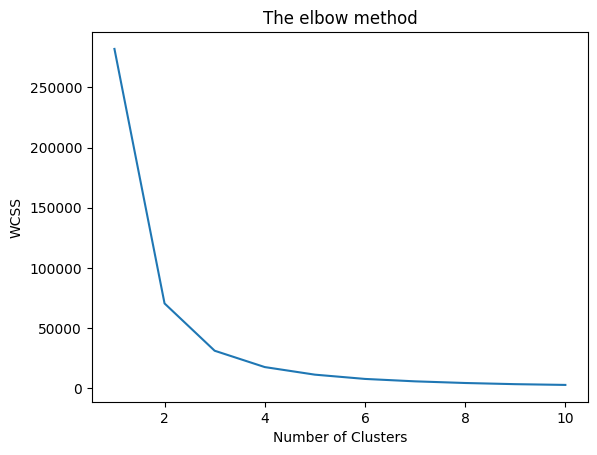

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()